In [1]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pylab as plt

In [2]:
@dataclass
class Calibration:
    a0 : float = 0
    a1 : float = 0
    a2 : float = 0
    a3 : float = 0

    def __call__(self, x):
        return self.a0 + self.a1*x + self.a2*x**2 + self.a3*x**3

    def __repr__(self):
        result = f'f(x) = '
        first_item = True
        if self.a0 != 0:
            result += f'{self.a0}'
            if first_item:
                first_item = False
            else:
                result += ' +'
        if self.a1 != 0:
            if first_item:
                first_item = False
            else:
                result += ' +'
            result += f' {self.a1}*x'
        if self.a2 != 0:
            if first_item:
                first_item = False
            else:
                result += ' +'
            result += f' {self.a2}*x^2'
        if self.a3 != 0:
            if first_item:
                first_item = False
            else:
                result += ' +'
            result += f' {self.a3}*x^3'
        return result

# Calibration curves for red channel

## Castriconi

Calibration from Castriconi, Roberta, et al. "Dose–response of EBT3 radiochromic films to proton and carbon ion clinical beams." Physics in Medicine & Biology 62.2 (2016): 377.

In Figure 1 we get calibration curve for 148 MeV protons. The calibration is a cubic equation:

$$
f(x) = a*x + b*x^3 \qquad \text{where} \quad a=0.11 \quad \text{and} \quad b=40.7
$$

It seems that the coefficients are inconsistent with the data from the plot. From the plot itself we read that netOD = 0.4 corresponds to dose of about 6 Gy, while $f(0.4) = 0.11*0.4+40.7*0.4^3 \approx 2.65$

If on the other hand we assume quadratic instead of cubic equation we get:

$$
g(x) = a*x + b*x^2 \qquad \text{where} \quad a=0.11 \quad \text{and} \quad b=40.7
$$

Then $g(0.4) = 0.11*0.4+40.7*0.4^2 \approx 6.55$

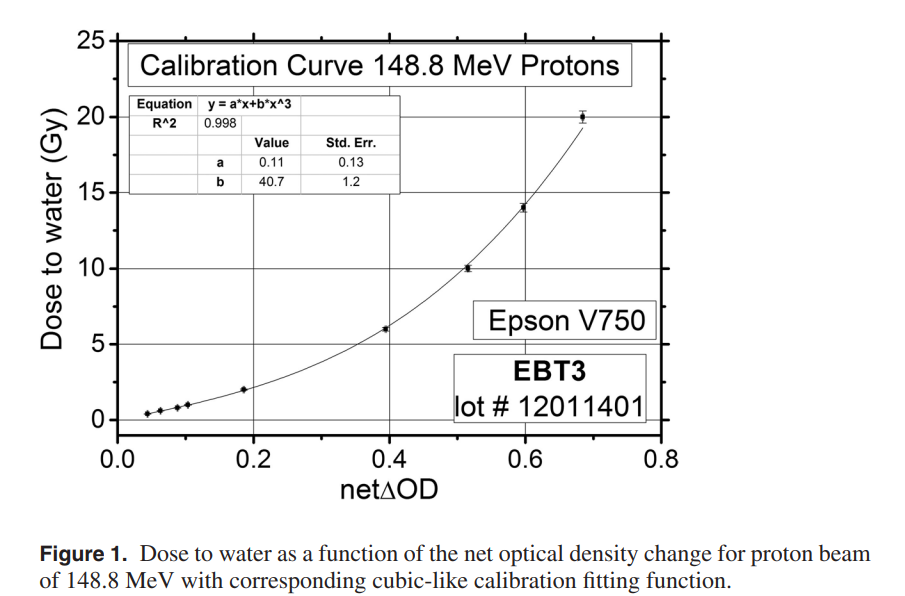

## Kusyk

kusyk1 corresponding to "krzywa 1" with formula "C7*C5+C8+C5^2"  (C5 is netAOD)

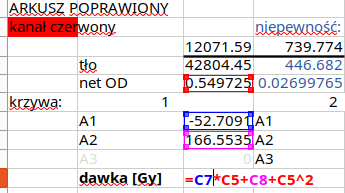

kusyk2 corresponding to "krzywa 2" with formula "E7*C5+E8*C5^2+E9*C5^3"  (C5 is netAOD)

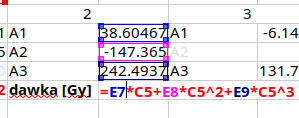

kusyk3 corresponding to "krzywa 3" with formula "G7*C5+G8*C5^2+G9*C5^3"  (C5 is netAOD)

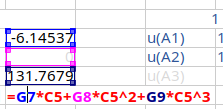

# Python implementation

In [3]:
castrictioni = Calibration(a1=0.11, a3=40.7)
castrictioni_bis = Calibration(a1=0.11, a2=40.7)
kusyk1 = Calibration(a0=166.55345, a1=-52.70907, a2=1)
kusyk2 = Calibration(a1=38.60467, a2=-147.36455, a3=242.49368)
kusyk3 = Calibration(a1=-6.14537, a3=131.76786)

In [4]:
kusyk_co60_v1 = Calibration(a1=-1.84957, a2=60.351)

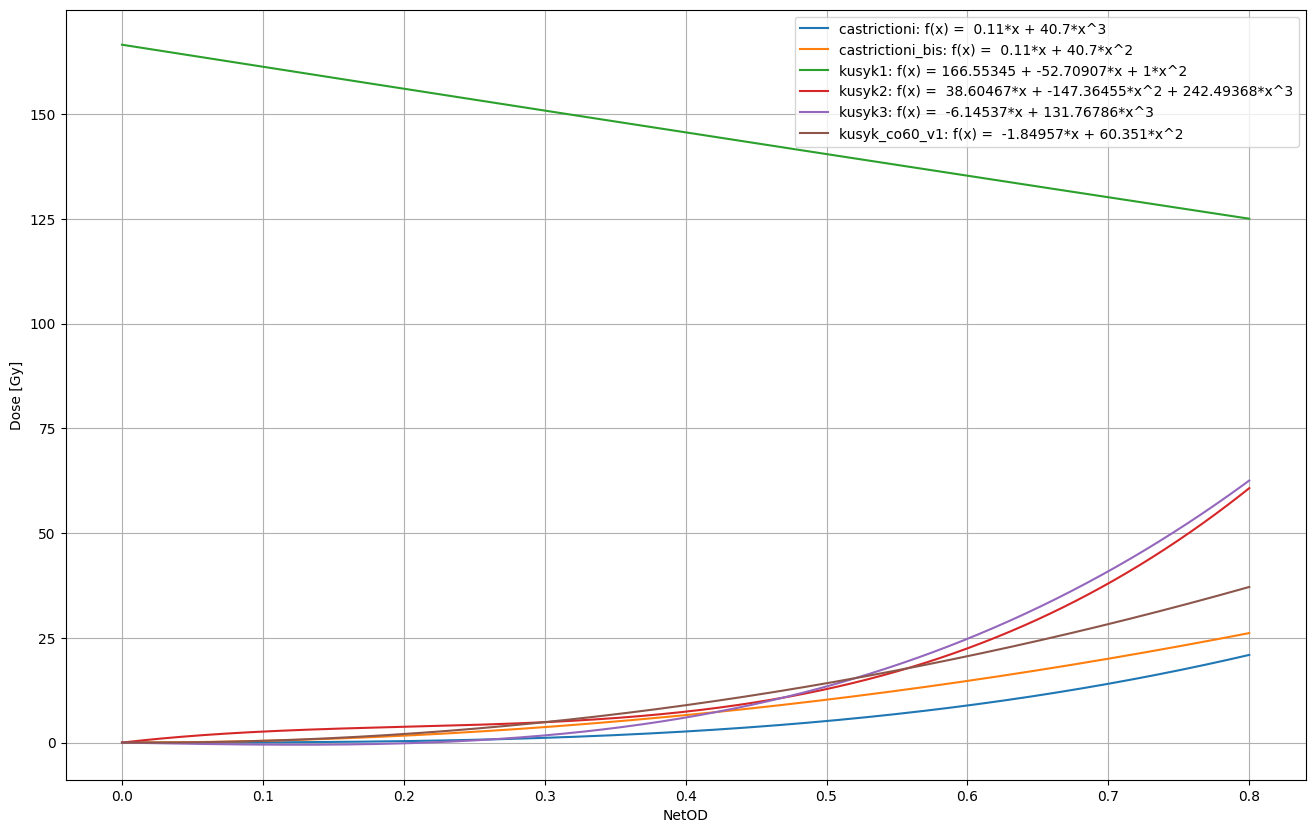

In [5]:
netOD_plot = np.linspace(0, 0.8, 800)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(netOD_plot, castrictioni(netOD_plot), label=f'castrictioni: {castrictioni}')
ax.plot(netOD_plot, castrictioni_bis(netOD_plot), label=f'castrictioni_bis: {castrictioni_bis}')
ax.plot(netOD_plot, kusyk1(netOD_plot), label=f'kusyk1: {kusyk1}')
ax.plot(netOD_plot, kusyk2(netOD_plot), label=f'kusyk2: {kusyk2}')
ax.plot(netOD_plot, kusyk3(netOD_plot), label=f'kusyk3: {kusyk3}')
ax.plot(netOD_plot, kusyk_co60_v1(netOD_plot), label=f'kusyk_co60_v1: {kusyk_co60_v1}')
ax.set_xlabel('NetOD')
ax.set_ylabel('Dose [Gy]')
ax.legend()
ax.grid()

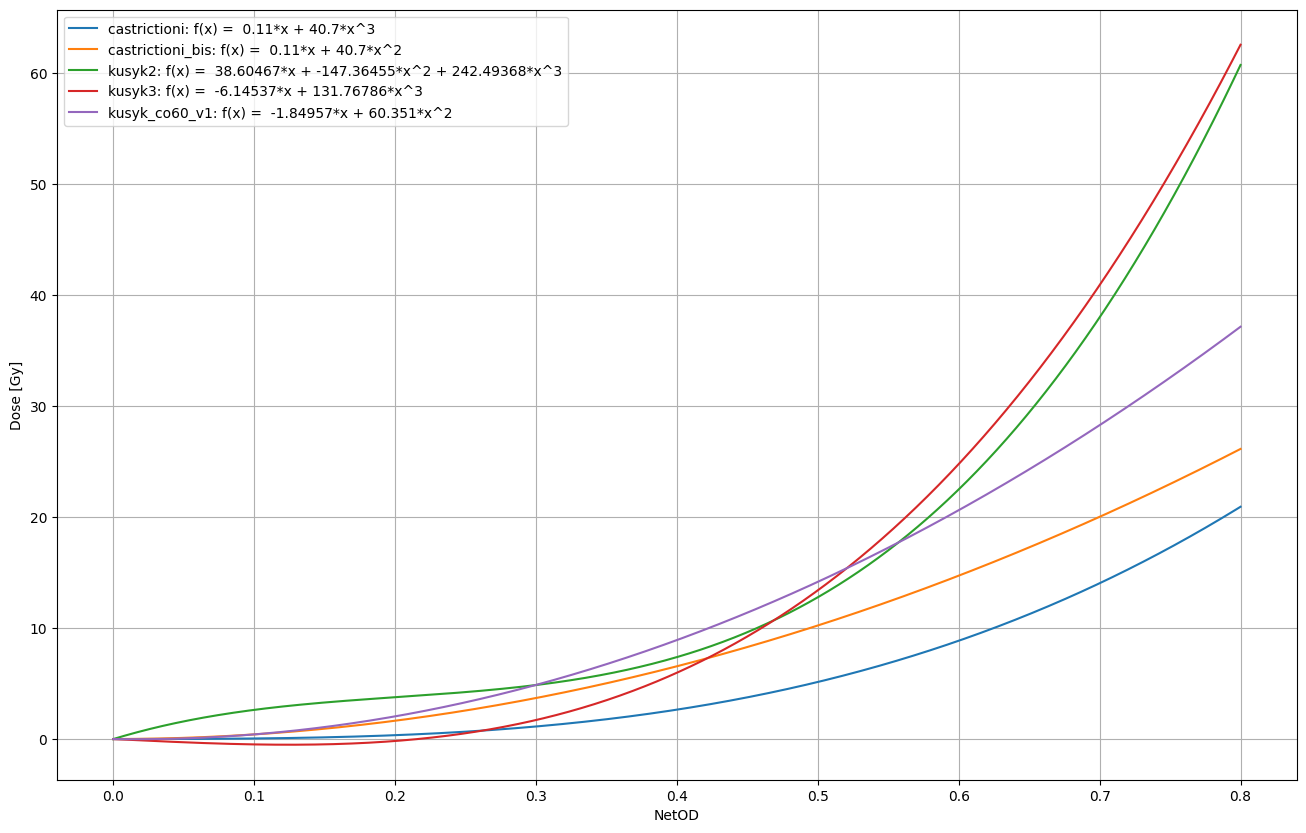

In [6]:
netOD_plot = np.linspace(0, 0.8, 800)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(netOD_plot, castrictioni(netOD_plot), label=f'castrictioni: {castrictioni}')
ax.plot(netOD_plot, castrictioni_bis(netOD_plot), label=f'castrictioni_bis: {castrictioni_bis}')
#ax.plot(netOD_plot, kusyk1(netOD_plot), label=f'kusyk1: {kusyk1}')
ax.plot(netOD_plot, kusyk2(netOD_plot), label=f'kusyk2: {kusyk2}')
ax.plot(netOD_plot, kusyk3(netOD_plot), label=f'kusyk3: {kusyk3}')
ax.plot(netOD_plot, kusyk_co60_v1(netOD_plot), label=f'kusyk_co60_v1: {kusyk_co60_v1}')
ax.set_xlabel('NetOD')
ax.set_ylabel('Dose [Gy]')
ax.legend()
ax.grid()

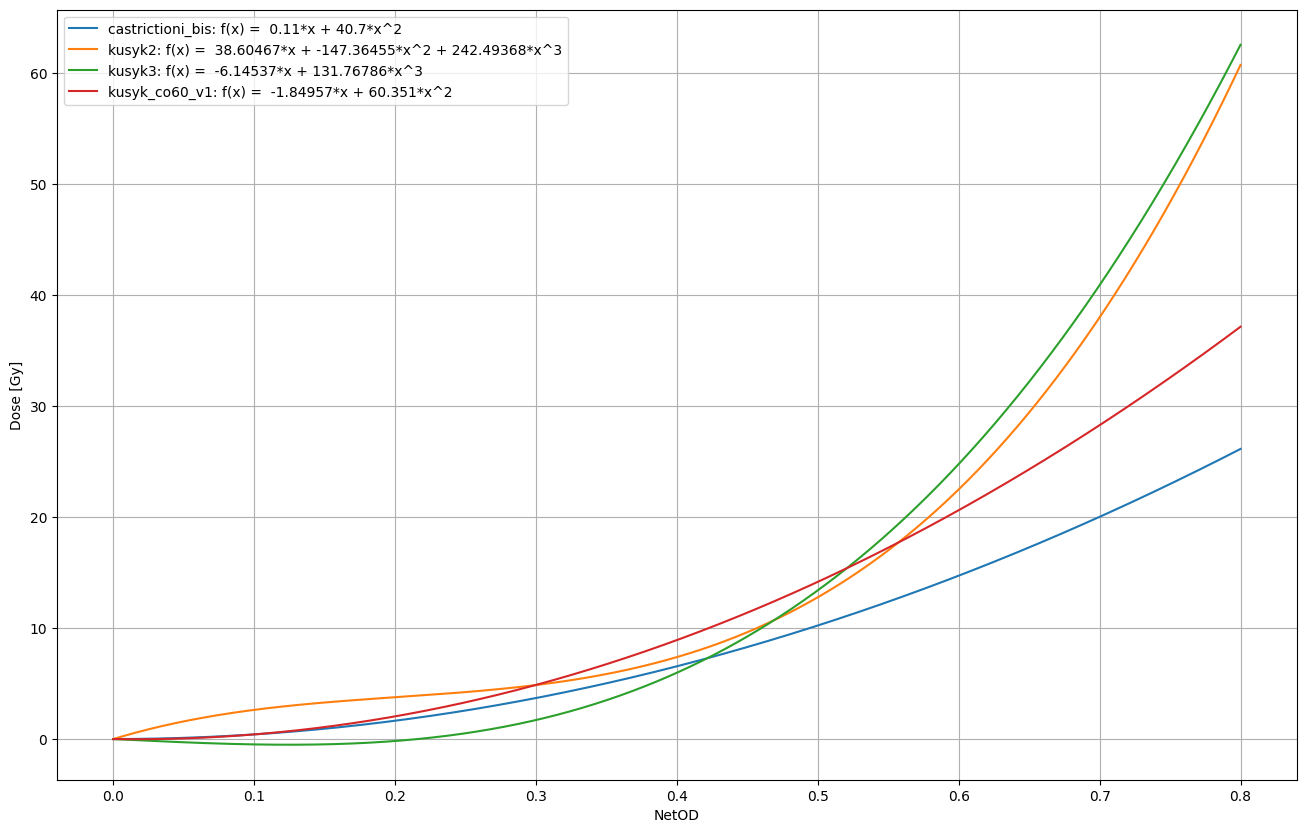

In [7]:
netOD_plot = np.linspace(0, 0.8, 800)

fig, ax = plt.subplots(figsize=(16,10))
#ax.plot(netOD_plot, castrictioni(netOD_plot), label=f'castrictioni: {castrictioni}')
ax.plot(netOD_plot, castrictioni_bis(netOD_plot), label=f'castrictioni_bis: {castrictioni_bis}')
#ax.plot(netOD_plot, kusyk1(netOD_plot), label=f'kusyk1: {kusyk1}')
ax.plot(netOD_plot, kusyk2(netOD_plot), label=f'kusyk2: {kusyk2}')
ax.plot(netOD_plot, kusyk3(netOD_plot), label=f'kusyk3: {kusyk3}')
ax.plot(netOD_plot, kusyk_co60_v1(netOD_plot), label=f'kusyk_co60_v1: {kusyk_co60_v1}')
ax.set_xlabel('NetOD')
ax.set_ylabel('Dose [Gy]')
ax.legend()
ax.grid()

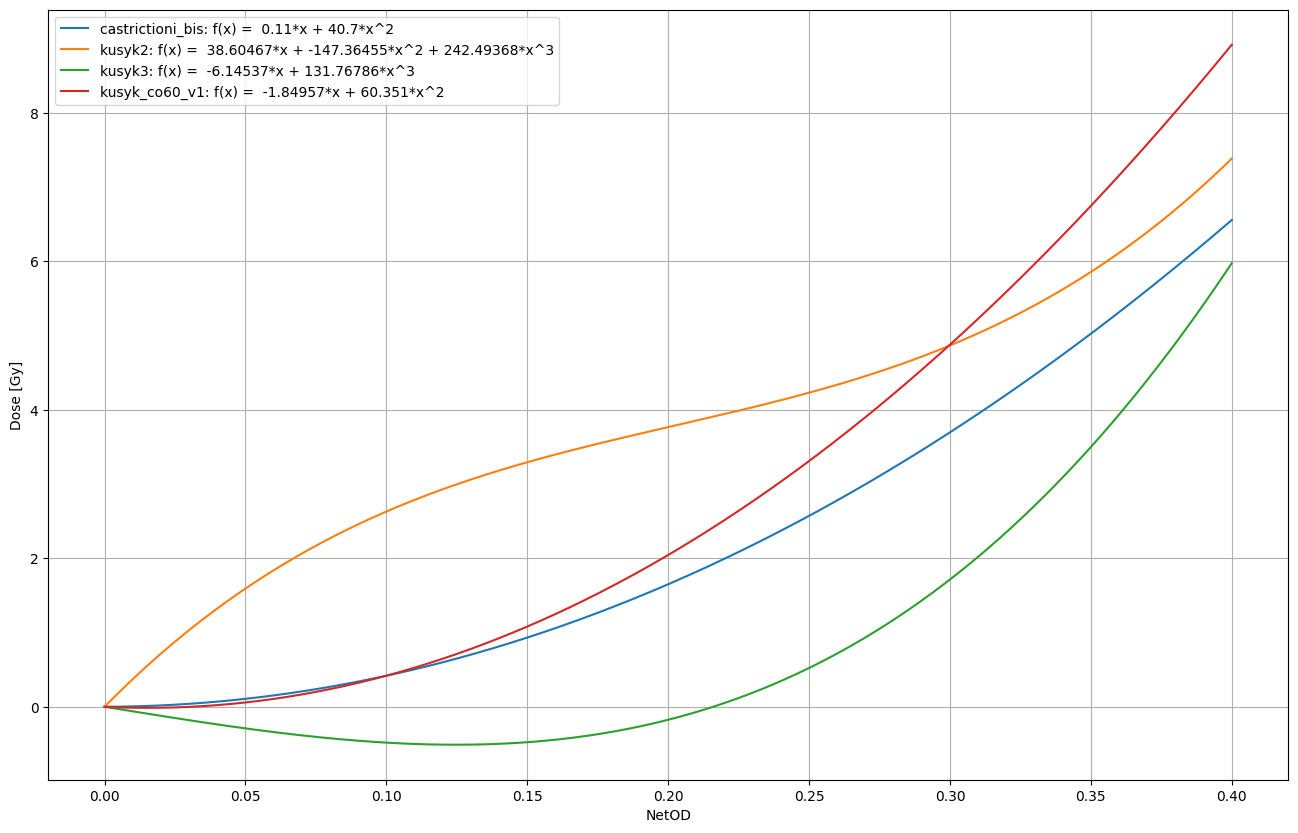

In [8]:
netOD_plot = np.linspace(0, 0.4, 800)

fig, ax = plt.subplots(figsize=(16,10))
#ax.plot(netOD_plot, castrictioni(netOD_plot), label=f'castrictioni: {castrictioni}')
ax.plot(netOD_plot, castrictioni_bis(netOD_plot), label=f'castrictioni_bis: {castrictioni_bis}')
#ax.plot(netOD_plot, kusyk1(netOD_plot), label=f'kusyk1: {kusyk1}')
ax.plot(netOD_plot, kusyk2(netOD_plot), label=f'kusyk2: {kusyk2}')
ax.plot(netOD_plot, kusyk3(netOD_plot), label=f'kusyk3: {kusyk3}')
ax.plot(netOD_plot, kusyk_co60_v1(netOD_plot), label=f'kusyk_co60_v1: {kusyk_co60_v1}')
ax.set_xlabel('NetOD')
ax.set_ylabel('Dose [Gy]')
ax.legend()
ax.grid()